# Report on NVIDIA Corporation (NVDA) Stock Performance (2020-2024)

**Introduction:**
NVIDIA Corporation (NVDA) is a leading technology company renowned for its graphics processing units (GPUs) and related products. This report provides an analysis of NVDA's stock performance from January 1, 2020, to May 5, 2024. By examining historical stock data, we aim to uncover trends, patterns, and factors influencing NVDA's stock price over this period.

**Dataset Overview:**
The dataset consists of 1092 observations and seven columns:

**Date:** The date of the stock data.

**Open:** The opening price of NVDA stock on the given date.

**High:** The highest price of NVDA stock during the trading day.

**Low:** The lowest price of NVDA stock during the trading day.

**Close:** The closing price of NVDA stock on the given date.

**Adj Close:** The adjusted closing price of NVDA stock, accounting for any corporate actions such as dividends or stock splits.

**Volume:** The trading volume of NVDA stock on the given date.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("/kaggle/input/nvidia-corporation-nvda-stock-2020-to-2024/nvda_stock_data.csv")

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741245,23753600
1,2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031548,26263600
3,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746220,31485600
4,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858280,27710800


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1.092000e+03
mean,254.334991,259.101096,249.356678,254.482093,254.270355,4.682122e+07
std,190.789638,194.100961,186.902226,190.612159,190.685090,1.869374e+07
min,50.025002,52.485001,45.169998,49.099998,48.935833,9.788400e+06
25%,132.953754,134.927505,130.639996,133.048748,132.740437,3.431215e+07
50%,187.599998,191.900002,183.885002,187.995003,187.759239,4.470295e+07
75%,297.559990,304.597504,288.080002,295.994987,295.573479,5.692440e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,1.543911e+08


# Key Findings:

**Trend Analysis:**
NVDA's stock price generally exhibited an upward trend from 2020 to 2024, with occasional fluctuations.
The closing prices increased over time, indicating overall positive investor sentiment and company performance.

**Volatility:**
The stock experienced fluctuations in price, as depicted by the candlestick chart and Bollinger Bands.
Volatility was influenced by various factors such as market conditions, industry trends, and company-specific news.

**Trading Volume:**
Trading volume fluctuated over time, with periods of high and low activity.
Elevated trading volume often coincided with significant price movements, indicating increased investor interest or trading activity.

**Technical Indicators:**
Moving Average Convergence Divergence (MACD) and Relative Strength Index (RSI) provided insights into momentum and overbought/oversold conditions, respectively.
Bollinger Bands helped identify periods of price consolidation and potential breakout opportunities.

In [11]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set Date column as the index
data.set_index('Date', inplace=True)

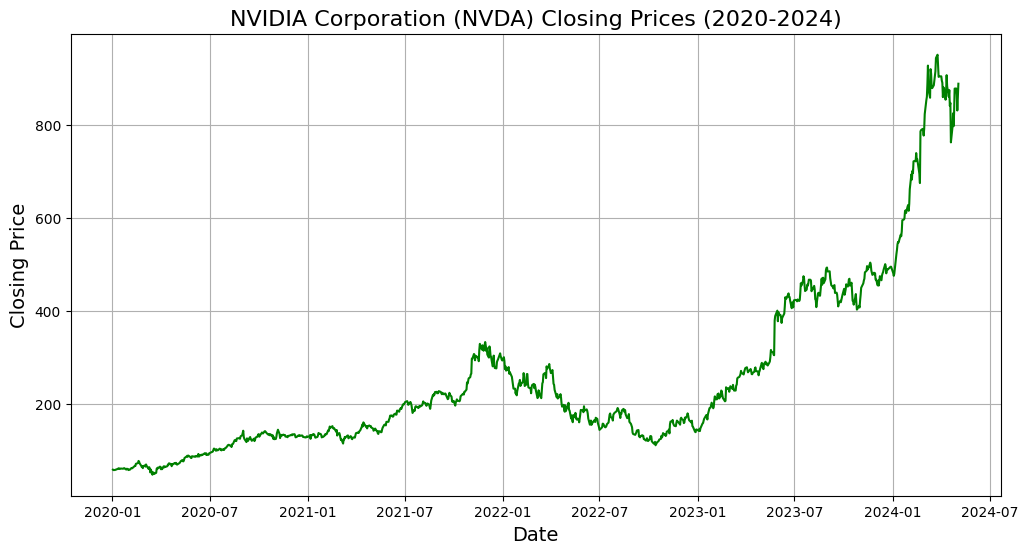

In [12]:
# Data visualization 1: Line plot of Closing Prices over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='green')
plt.title('NVIDIA Corporation (NVDA) Closing Prices (2020-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.grid(True)
plt.show()

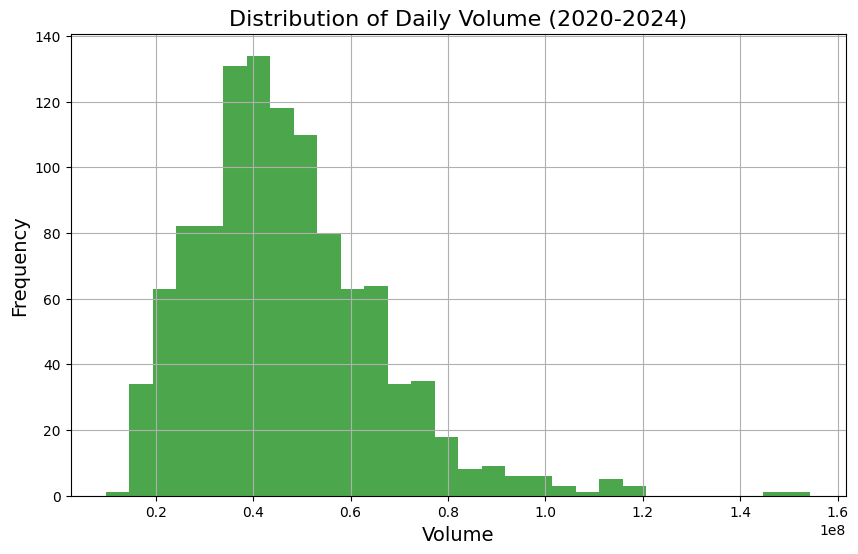

In [18]:
# Data visualization 2: Histogram of Daily Volume
plt.figure(figsize=(10, 6))
plt.hist(data['Volume'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Daily Volume (2020-2024)', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

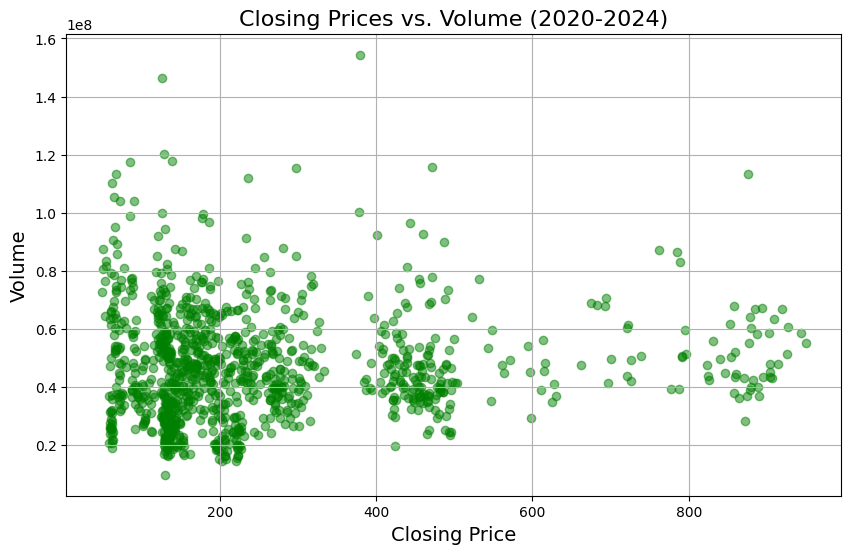

In [19]:
# Data visualization 3: Scatter plot of Closing Prices vs. Volume
plt.figure(figsize=(10, 6))
plt.scatter(data['Close'], data['Volume'], color='green', alpha=0.5)
plt.title('Closing Prices vs. Volume (2020-2024)', fontsize=16)
plt.xlabel('Closing Price', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.show()

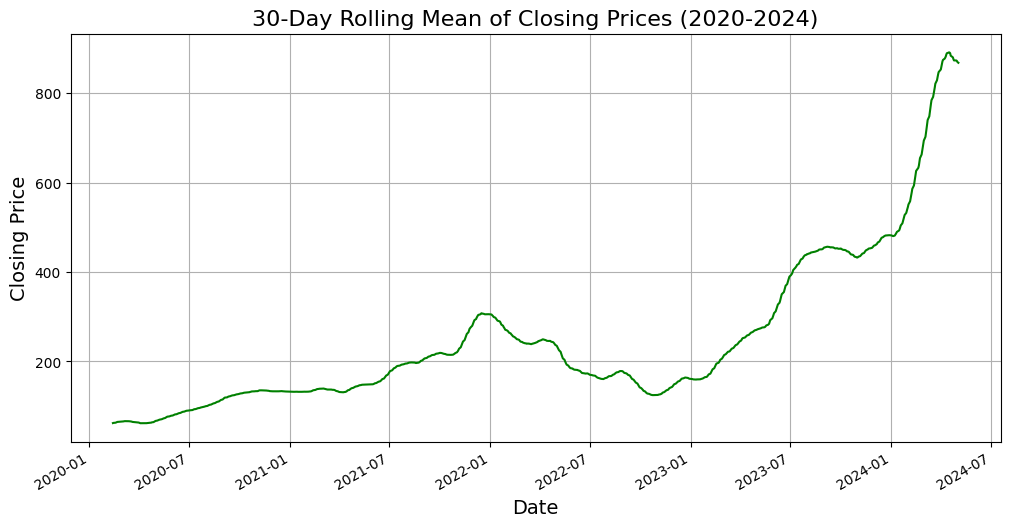

In [20]:
# Data visualization 4: Rolling Mean of Closing Prices
plt.figure(figsize=(12, 6))
data['Close'].rolling(window=30).mean().plot(color='green')
plt.title('30-Day Rolling Mean of Closing Prices (2020-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.grid(True)
plt.show()

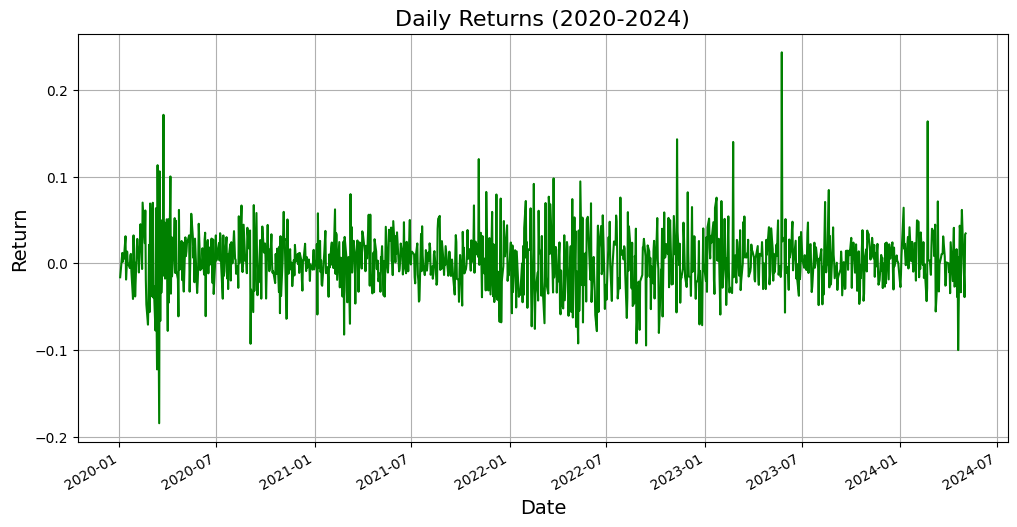

In [21]:
# Data visualization 5: Daily Returns
daily_returns = data['Close'].pct_change()
plt.figure(figsize=(12, 6))
daily_returns.plot(color='green')
plt.title('Daily Returns (2020-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.grid(True)
plt.show()

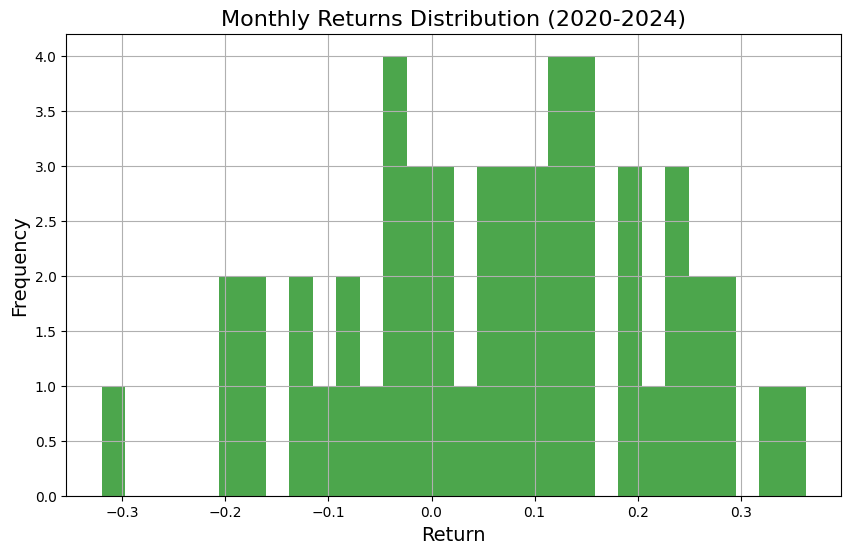

In [22]:
# Data visualization 6: Monthly Returns Distribution
monthly_returns = data['Close'].resample('M').ffill().pct_change()
plt.figure(figsize=(10, 6))
plt.hist(monthly_returns, bins=30, color='green', alpha=0.7)
plt.title('Monthly Returns Distribution (2020-2024)', fontsize=16)
plt.xlabel('Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

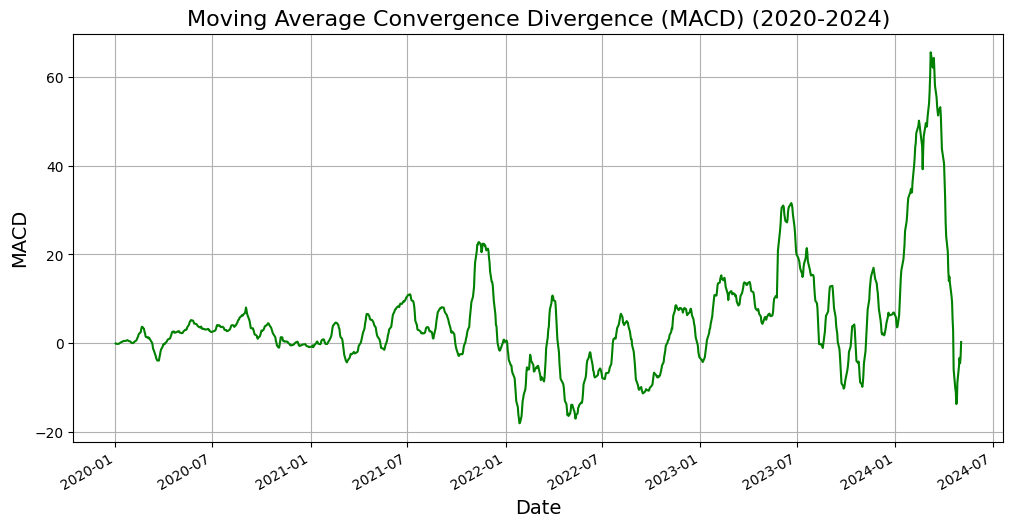

In [24]:
# Data visualization 7: Moving Average Convergence Divergence (MACD)
short_window = 12
long_window = 26

short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

macd = short_ema - long_ema

plt.figure(figsize=(12, 6))
macd.plot(color='green')
plt.title('Moving Average Convergence Divergence (MACD) (2020-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MACD', fontsize=14)
plt.grid(True)
plt.show()

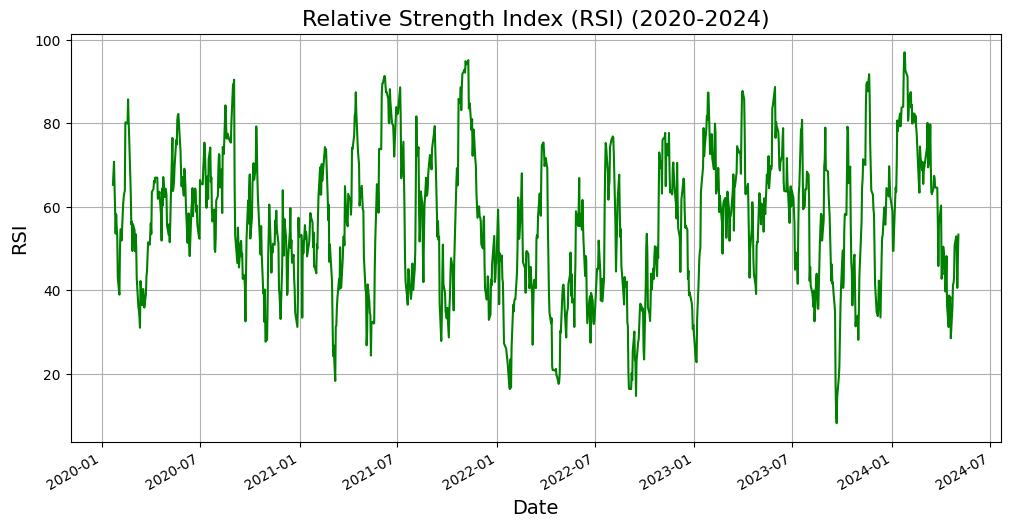

In [25]:
# Data visualization 8: Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
rsi = 100 - (100 / (1 + rs))

plt.figure(figsize=(12, 6))
rsi.plot(color='green')
plt.title('Relative Strength Index (RSI) (2020-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('RSI', fontsize=14)
plt.grid(True)
plt.show()

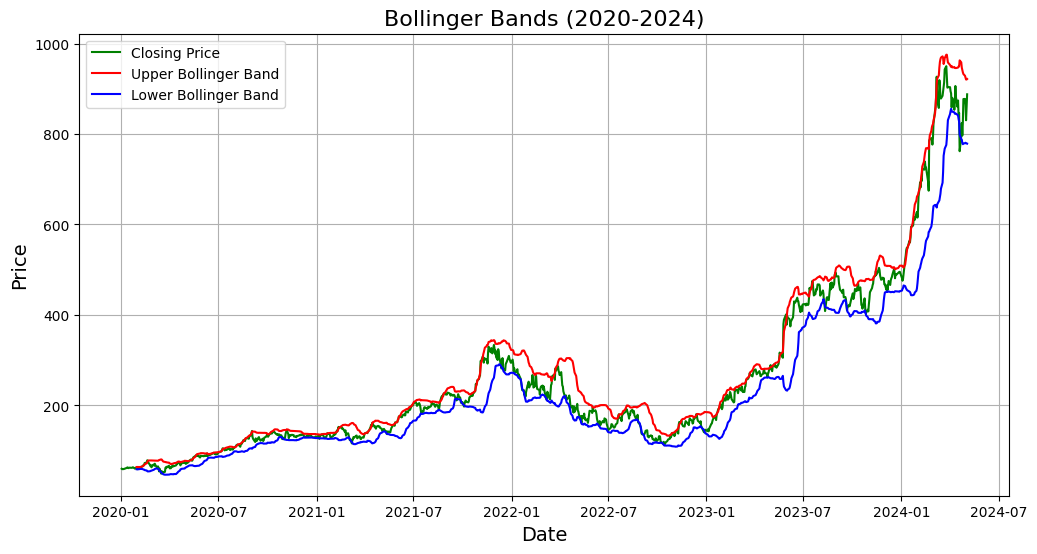

In [26]:
# Data visualization 9: Bollinger Bands
window = 20
std = data['Close'].rolling(window=window).std()
data['Upper Band'] = data['Close'].rolling(window=window).mean() + (std * 2)
data['Lower Band'] = data['Close'].rolling(window=window).mean() - (std * 2)

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='green', label='Closing Price')
plt.plot(data['Upper Band'], color='red', label='Upper Bollinger Band')
plt.plot(data['Lower Band'], color='blue', label='Lower Bollinger Band')
plt.title('Bollinger Bands (2020-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Conclusion:
In conclusion, the analysis of NVIDIA Corporation (NVDA) stock performance from 2020 to 2024 reveals a generally positive trend with fluctuations influenced by market dynamics and company-specific factors. Investors should consider a comprehensive approach, incorporating technical analysis, fundamental analysis, and market sentiment to make informed decisions regarding NVDA stock.